# Project Name : Client Subscribed to a term deposit

In [1]:
#Step 1: Load and Inspect the Dataset

In [2]:
import pandas as pd
df = pd.read_csv("bankmarketing.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Step 2: Handle Missing Values and Clean the Data

In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in cat_cols:
    print(f"{col} - 'unknown' count: {(df[col] == 'unknown').sum()}")

job - 'unknown' count: 330
marital - 'unknown' count: 80
education - 'unknown' count: 1731
default - 'unknown' count: 8597
housing - 'unknown' count: 990
loan - 'unknown' count: 990
contact - 'unknown' count: 0
month - 'unknown' count: 0
day_of_week - 'unknown' count: 0
poutcome - 'unknown' count: 0


In [6]:
df.drop(columns=['default'], inplace=True)

In [7]:
for col in ['job', 'marital', 'education', 'housing', 'loan']:
    mode_val = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode_val)

In [8]:
# Confirm cleanup
for col in ['job', 'marital', 'education', 'housing', 'loan']:
    print(f"{col} - 'unknown' count after cleanup: {(df[col] == 'unknown').sum()}")

job - 'unknown' count after cleanup: 0
marital - 'unknown' count after cleanup: 0
education - 'unknown' count after cleanup: 0
housing - 'unknown' count after cleanup: 0
loan - 'unknown' count after cleanup: 0


In [9]:
 #Step 3: Exploratory Data Analysis (EDA)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt




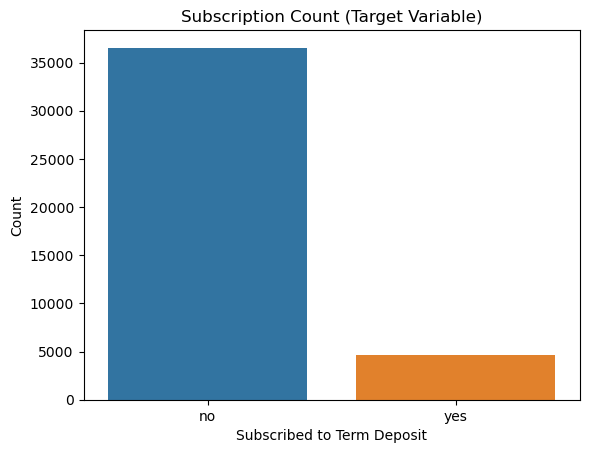

In [11]:
sns.countplot(data=df, x='y')
plt.title("Subscription Count (Target Variable)")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.show()

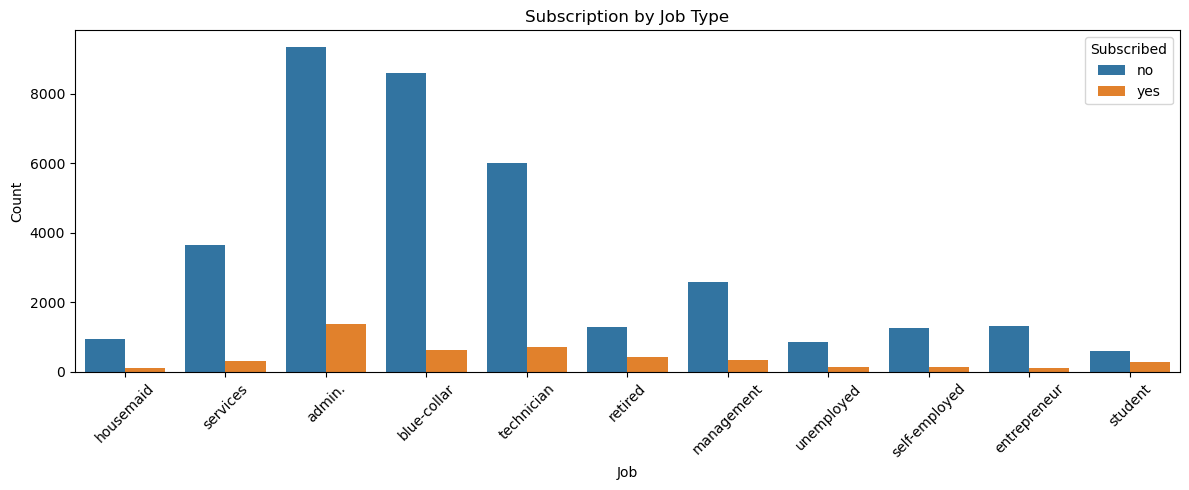

In [12]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='job', hue='y')
plt.title("Subscription by Job Type")
plt.xticks(rotation=45)
plt.xlabel("Job")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.tight_layout()
plt.show()

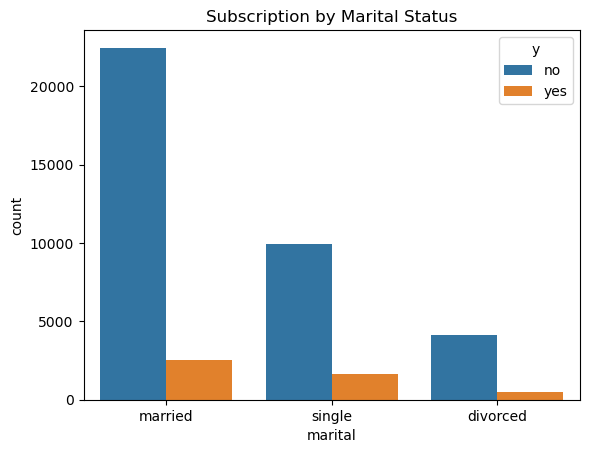

In [13]:
sns.countplot(data=df, x='marital', hue='y')
plt.title("Subscription by Marital Status")
plt.show()

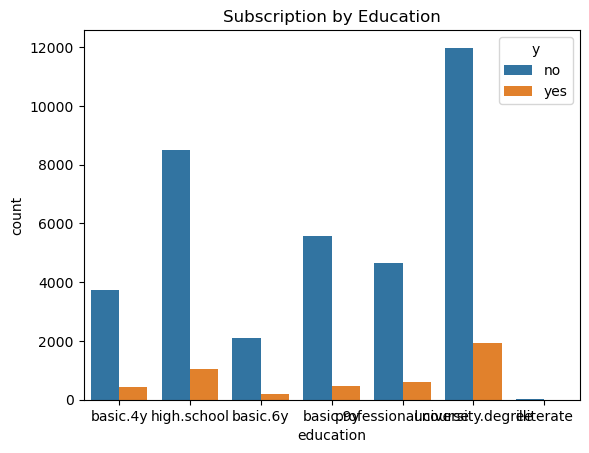

In [14]:
sns.countplot(data=df, x='education', hue='y')
plt.title("Subscription by Education")
plt.show()

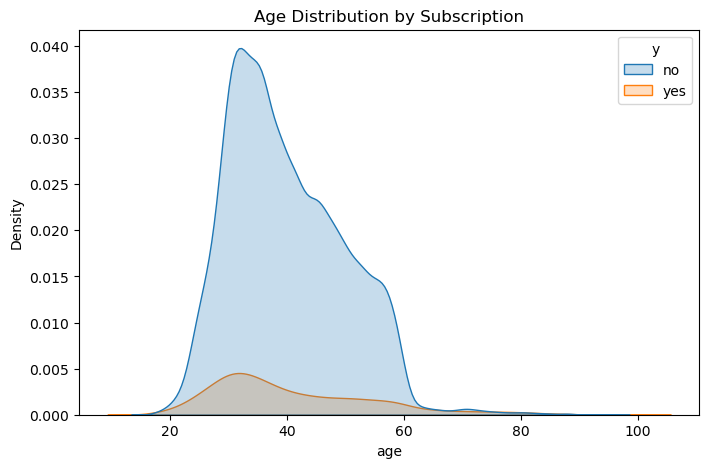

In [15]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='age', hue='y', fill=True)
plt.title("Age Distribution by Subscription")
plt.show()

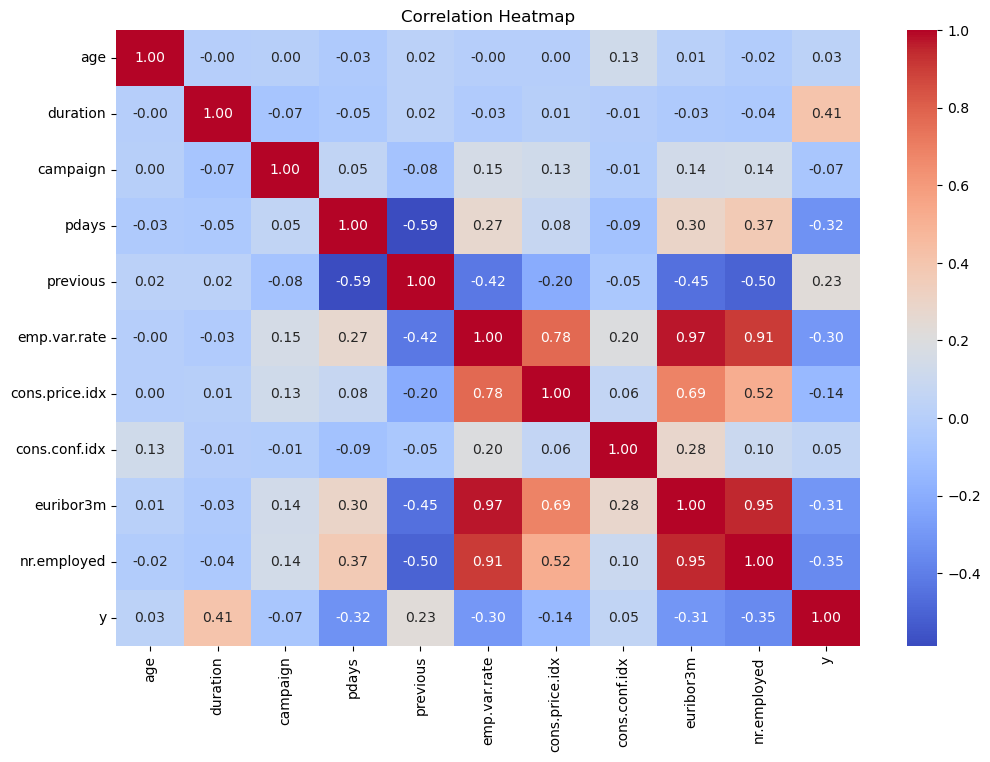

In [16]:
df_temp = df.copy()
df_temp['y'] = df_temp['y'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(12, 8))
sns.heatmap(df_temp.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Step 4: Encoding Categorical Variables & Normalizing Numerical Features

In [18]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [23]:
# Identify categorical features
numerical_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

In [24]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])




In [25]:
# Step 5: Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (32950, 46)
Testing features shape: (8238, 46)
Training target shape: (32950,)
Testing target shape: (8238,)


In [30]:
#Step 6: Train Multiple Classification Models

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

In [33]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Step 7: Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




In [36]:
# Store models in a dictionary
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf
}



In [37]:
# Evaluate each model
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

In [38]:
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.909687   0.657851  0.425668  0.516883
Decision Tree        0.888444   0.508147  0.533690  0.520605
Random Forest        0.912357   0.650636  0.491979  0.560292


In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import joblib

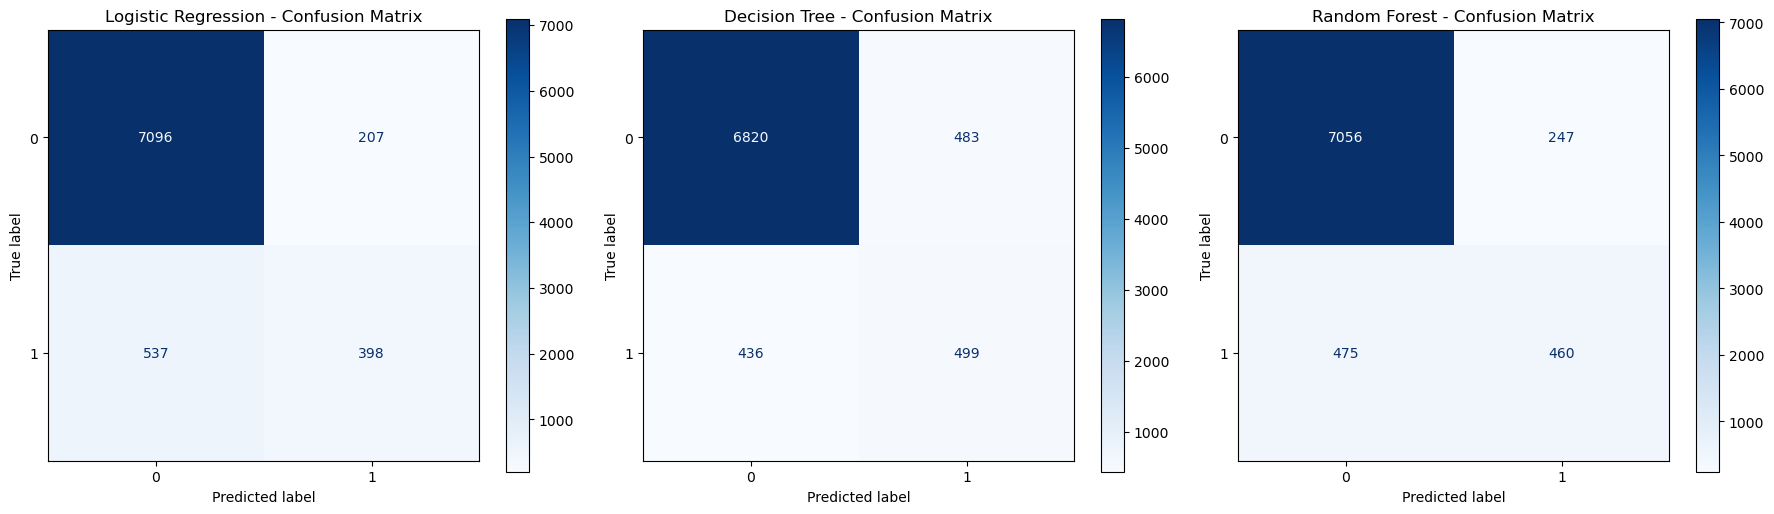

In [40]:
#  Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(f'{name} - Confusion Matrix')
plt.tight_layout()
plt.show()

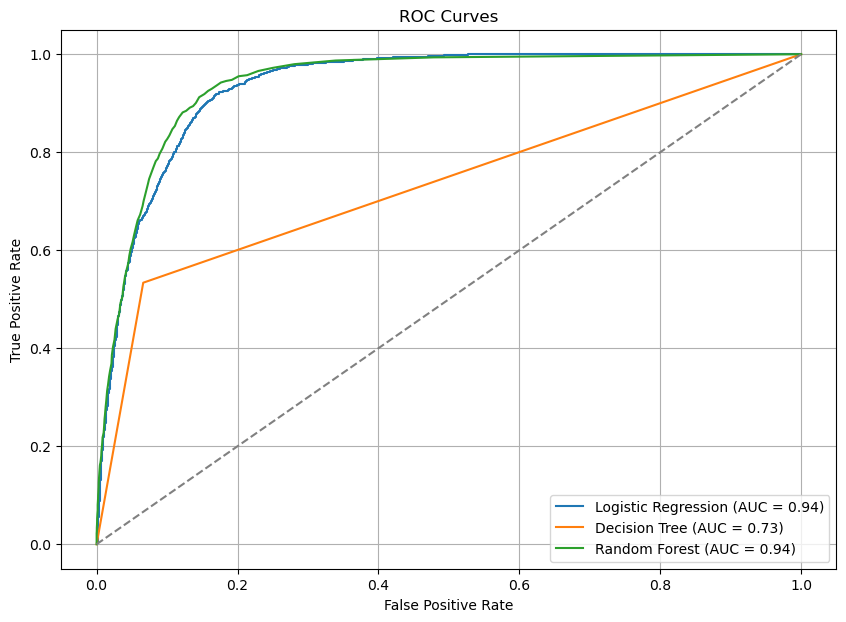

In [41]:
#  ROC Curves
plt.figure(figsize=(10, 7))
for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()

In [42]:
#  Save best model (Random Forest)
joblib.dump(models["Random Forest"], "random_forest_model.pkl")

['random_forest_model.pkl']